# 3.2 DCNN示例——LeNet

In [1]:
from matplotlib import pyplot as plt
from keras import layers, Input
from keras.models import Model
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.optimizers import Adam
from keras.losses import categorical_crossentropy
from keras.callbacks import ModelCheckpoint
from keras import backend as K

Using TensorFlow backend.


In [2]:
# 超参数设定
HP_epochs = 20
HP_batch_size = 128
HP_validation_split = 0.2
HP_input_shape = (28, 28, 1)

In [3]:
# 搭建网络模型
def network(input_shape):
    input_tensor = Input(shape=input_shape)
    
    conv1 = layers.Conv2D(32, (3, 3))(input_tensor)
    conv1 = layers.Activation('relu')(conv1)
    conv1 = layers.MaxPooling2D((2, 2))(conv1)
    
    conv2 = layers.Conv2D(64, (3, 3))(conv1)
    conv2 = layers.Activation('relu')(conv2)
    conv2 = layers.MaxPooling2D((2, 2))(conv2)
    
    conv3 = layers.Conv2D(64, (3, 3))(conv2)
    conv3 = layers.Activation('relu')(conv3)

    dense4 = layers.Flatten()(conv3)
    dense4 = layers.Dense(128)(dense4)
    dense4 = layers.Activation('relu')(dense4)
    
    output_tensor = layers.Dense(10)(dense4)
    output_tensor = layers.Activation('softmax')(output_tensor)
    
    model = Model(input_tensor, output_tensor)
    return model

In [4]:
# 定义LeNet
class LeNet:
    @staticmethod
    def build(input_shape, classes):
        input_tensor = Input(shape=input_shape)
        
        conv1 = layers.Conv2D(20, (5, 5), padding='same')(input_tensor)
        conv1 = layers.Activation(('relu'))(conv1)
        conv1 = layers.MaxPooling2D((2, 2))(conv1)
        
        conv2 = layers.Conv2D(20, (5, 5), padding='same')(conv1)
        conv2 = layers.Activation(('relu'))(conv2)
        conv2 = layers.MaxPooling2D((2, 2))(conv2)
        
        dense3 = layers.Flatten()(conv2)
        dense3 = layers.Dense(500)(dense3)
        dense3 = layers.Activation('relu')(dense3)
        
        output_tensor = layers.Dense(classes)(dense3)
        output_tensor = layers.Activation('softmax')(output_tensor)
        
        model = Model(input_tensor, output_tensor)
        return model

In [5]:
# 查看模型概要
# model = network(HP_input_shape)
model = LeNet.build(HP_input_shape, 10)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 20)        520       
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 20)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 20)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 20)        10020     
_________________________________________________________________
activation_2 (Activation)    (None, 14, 14, 20)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 20)          0         
__________

In [6]:
# 预处理数据
def preprocessing():
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    
    x_train = x_train.reshape(x_train.shape + (1,))
    x_train = x_train.astype('float32') / 255.
    x_test = x_test.reshape(x_test.shape + (1,))
    x_test = x_test.astype('float32') / 255.
    
    y_train = to_categorical(y_train, 10)
    y_test = to_categorical(y_test, 10)
    
    return (x_train, y_train), (x_test, y_test)

(X_train, Y_train), (X_test, Y_test) = preprocessing()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [7]:
# 编译模型
model.compile(
    optimizer=Adam(),
    loss=categorical_crossentropy,
    metrics=['acc']
)

In [8]:
# 设置回调模块
callbacks = [
    ModelCheckpoint(
        filepath='cnn_weights.h5',
        monitor='val_loss',
        save_best_only=True
    )
]

In [9]:
history = model.fit(
    X_train, Y_train,
    epochs=HP_epochs,
    batch_size=HP_batch_size,
    validation_split=HP_validation_split,
    callbacks=callbacks
)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 5s 111us/step - loss: 0.2239 - acc: 0.9335 - val_loss: 0.0767 - val_acc: 0.9762
Epoch 2/20
48000/48000 [==============================] - 4s 88us/step - loss: 0.0603 - acc: 0.9812 - val_loss: 0.0605 - val_acc: 0.9816
Epoch 3/20
48000/48000 [==============================] - 4s 89us/step - loss: 0.0389 - acc: 0.9881 - val_loss: 0.0463 - val_acc: 0.9862
Epoch 4/20
48000/48000 [==============================] - 4s 86us/step - loss: 0.0283 - acc: 0.9909 - val_loss: 0.0376 - val_acc: 0.9884
Epoch 5/20
48000/48000 [==============================] - 4s 85us/step - loss: 0.0219 - acc: 0.9930 - val_loss: 0.0399 - val_acc: 0.9880
Epoch 6/20
48000/48000 [==============================] - 4s 85us/step - loss: 0.0184 - acc: 0.9938 - val_loss: 0.0438 - val_acc: 0.9867
Epoch 7/20
48000/48000 [==============================] - 4s 89us/step - loss: 0.0134 - acc: 0.9958 - val_loss: 0.0348 - val_ac

In [10]:
# 测试训练结果
score = model.evaluate(
    X_test, Y_test
)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

test_model = LeNet.build(HP_input_shape, 10)
test_model.compile(
    optimizer=Adam(),
    loss=categorical_crossentropy,
    metrics=['acc']
)
test_model.load_weights('cnn_weights.h5')
score = test_model.evaluate(
    X_test, Y_test
)
print('Best weights test loss:', score[0])
print('Best weights test accuracy:', score[1])

10000/10000 [==============================] - 0s 50us/step
Test loss: 0.03456442594053228
Test accuracy: 0.9909
10000/10000 [==============================] - 1s 52us/step
Best weights test loss: 0.028761325437383495
Best weights test accuracy: 0.9906


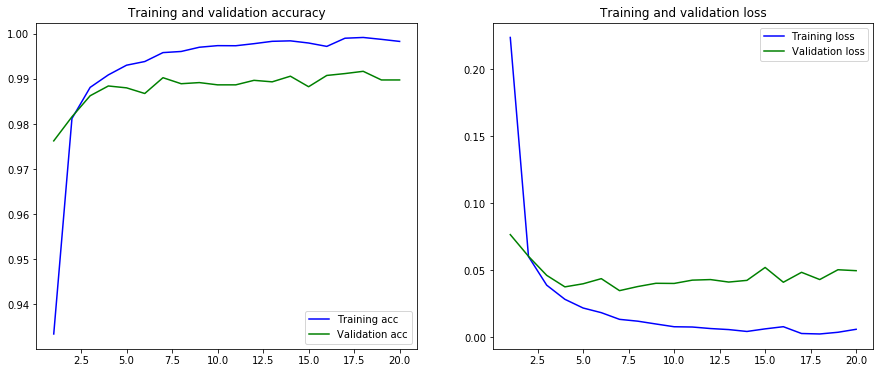

In [11]:
# 绘制训练曲线
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt_epochs = range(1, len(acc) + 1)

plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.plot(plt_epochs, acc, 'b', label='Training acc')
plt.plot(plt_epochs, val_acc, 'g', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend(loc='best')

plt.subplot(1, 2, 2)
plt.plot(plt_epochs, loss, 'b', label='Training loss')
plt.plot(plt_epochs, val_loss, 'g', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc='best')

plt.show()

# 3.3 用深度学习网络识别CIFAR-10图像

In [28]:
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras import layers, Input
from keras.models import Model
from keras.optimizers import SGD, Adam, RMSprop
import matplotlib.pyplot as plt

In [29]:
# 超参数设置
IMG_CHANNELS = 3
IMG_ROWS = 32
IMG_COLS = 32

BATCH_SIZE = 128
EPOCHS = 40
CLASSES = 10
VALIDATION_SPLIT = 0.2
OPTIMIZER = RMSprop()

In [30]:
# 数据预处理
def preprocessing(classes=10):
    (x_train, y_train), (x_test, y_test) = cifar10.load_data()
    print('x_train shape:', x_train.shape)
    print(x_train.shape[0], 'train sample')
    print(x_test.shape[0], 'test sample')
    # 训练标签转换为one_hot格式
    y_train = to_categorical(y_train, classes)
    y_test = to_categorical(y_test, classes)
    # 训练图片归一化
    x_train = x_train.astype('float32') / 255.
    x_test = x_test.astype('float32') / 255.
    
    return (x_train, y_train), (x_test, y_test)

(x_train, y_train), (x_test, y_test) = preprocessing(CLASSES)

x_train shape: (50000, 32, 32, 3)
50000 train sample
10000 test sample


In [31]:
# 构建网络
def cifar10_network(input_shape, classes=10):
    input_tensor = Input(shape=input_shape)
    
    conv1 = layers.Conv2D(32, (3, 3), padding='same')(input_tensor)
    conv1 = layers.Activation('relu')(conv1)
    
    conv2 = layers.Conv2D(32, (3, 3), padding='same')(conv1)
    conv2 = layers.Activation('relu')(conv2)
    conv2 = layers.MaxPooling2D((2, 2))(conv2)
    conv2 = layers.Dropout(0.25)(conv2)
    
    conv3 = layers.Conv2D(64, (3, 3), padding='same')(conv2)
    conv3 = layers.Activation('relu')(conv3)
    
    conv4 = layers.Conv2D(64, (3, 3))(conv3)
    conv4 = layers.Activation('relu')(conv4)
    conv4 = layers.MaxPooling2D((2, 2))(conv4)
    conv4 = layers.Dropout(0.25)(conv4)
    
    dense5 = layers.Flatten()(conv4)
    dense5 = layers.Dense(512)(dense5)
    dense5 = layers.Activation('relu')(dense5)
    dense5 = layers.Dropout(0.5)(dense5)
    
    output_tensor = layers.Dense(classes)(dense5)
    output_tensor = layers.Activation('softmax')(output_tensor)
    
    model = Model(input_tensor, output_tensor)
    return model

In [32]:
# 检查模型
model = cifar10_network((IMG_ROWS, IMG_COLS, IMG_CHANNELS), CLASSES)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_25 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_26 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 16, 16, 32)        0         
__________

In [33]:
# 训练
model.compile(
    optimizer=OPTIMIZER,
    loss='categorical_crossentropy',
    metrics=['acc']
)

history = model.fit(
    x_train, y_train,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_split=VALIDATION_SPLIT
)

Train on 40000 samples, validate on 10000 samples
Epoch 1/40
40000/40000 [==============================] - 13s 320us/step - loss: 1.7707 - acc: 0.3599 - val_loss: 1.4081 - val_acc: 0.4879
Epoch 2/40
40000/40000 [==============================] - 12s 296us/step - loss: 1.3274 - acc: 0.5282 - val_loss: 1.1456 - val_acc: 0.5933
Epoch 3/40
40000/40000 [==============================] - 12s 302us/step - loss: 1.1275 - acc: 0.6024 - val_loss: 1.0740 - val_acc: 0.6224
Epoch 4/40
40000/40000 [==============================] - 12s 301us/step - loss: 1.0014 - acc: 0.6486 - val_loss: 0.8936 - val_acc: 0.6877
Epoch 5/40
40000/40000 [==============================] - 12s 298us/step - loss: 0.8981 - acc: 0.6849 - val_loss: 0.8310 - val_acc: 0.7093
Epoch 6/40
40000/40000 [==============================] - 12s 301us/step - loss: 0.8260 - acc: 0.7110 - val_loss: 0.7804 - val_acc: 0.7329
Epoch 7/40
40000/40000 [==============================] - 12s 304us/step - loss: 0.7654 - acc: 0.7371 - val_loss: 1.

In [34]:
# 测试
score = model.evaluate(
    x_test, y_test,
    batch_size=BATCH_SIZE
)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

10000/10000 [==============================] - 1s 93us/step
Test loss: 0.7558425786018371
Test accuracy: 0.7632


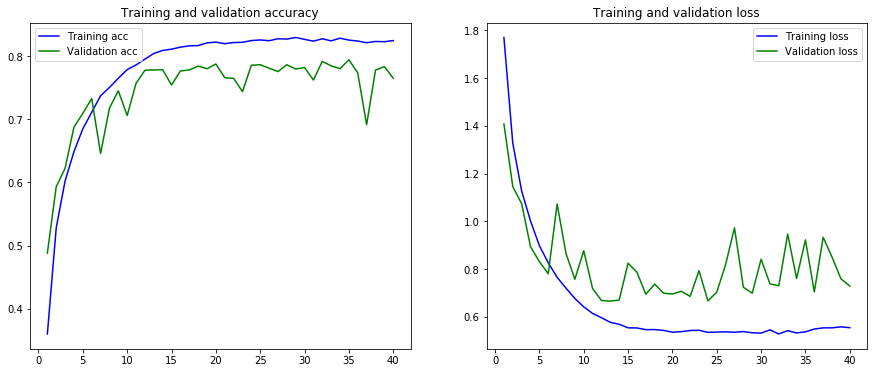

In [35]:
# 可视化
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt_epochs = range(1, len(acc) + 1)

plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.plot(plt_epochs, acc, 'b', label='Training acc')
plt.plot(plt_epochs, val_acc, 'g', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend(loc='best')

plt.subplot(1, 2, 2)
plt.plot(plt_epochs, loss, 'b', label='Training loss')
plt.plot(plt_epochs, val_loss, 'g', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc='best')

plt.show()